In [1]:
import cv2
import pytesseract
from datetime import date
from os import listdir
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [2]:
img_files = ['./gas/' + name for name in listdir(path='./gas')]
img_files

['./gas/Screenshot_20180803-182402.png',
 './gas/Screenshot_20180830-164416.png',
 './gas/Screenshot_20180816-102947.png',
 './gas/Screenshot_20180823-172051.png',
 './gas/Screenshot_20180815-223352.png',
 './gas/Screenshot_20180929-192124.png',
 './gas/Screenshot_20180909-210814.png',
 './gas/Screenshot_20180914-143150.png',
 './gas/Screenshot_20190324-145746.png',
 './gas/Screenshot_20180821-143439.png',
 './gas/Screenshot_20180906-205921.png',
 './gas/Screenshot_20180711-184438.png',
 './gas/Screenshot_20190504-162538.png',
 './gas/Screenshot_20180829-211838.png',
 './gas/Screenshot_20190414-184620.png',
 './gas/Screenshot_20180813-154315.png',
 './gas/Screenshot_20190430-091108.png',
 './gas/Screenshot_20190303-164556.png']

In [3]:
im = cv2.imread(img_files[2], cv2.IMREAD_COLOR)
text = pytesseract.image_to_string(im, config='-l eng --oem 1 --psm 3')
print(img_files[2],text.splitlines())


./gas/Screenshot_20180816-102947.png ['M@maArvalt @ iD 4 & 10:29', '', '176412.271', '', '14.3427593513161', '', ' ', '', 'nn', 'Cr', 'Cr:']


In [4]:
for image in img_files:
    text = pytesseract.image_to_string(cv2.imread(image, cv2.IMREAD_COLOR), config='-l eng --oem 1 --psm 3')
    print(image[17:25])
    for line in text.splitlines():
        decimal_idx = line.find('.')
        if decimal_idx == -1: pass
        elif (line[:decimal_idx] + line[decimal_idx+1:]).isdigit():
            print(line); break

20180803
15.6588953995761
20180830
14.5772932853995
20180816
176412.271
20180823
15.4868987094251
20180815
14.7424084608605
20180929
18.6072491682717
20180909
13.4028892455858
20180914
13.6540688493525
20190324
31.173881895
20180821
20180906
13.1880385200202
20180711
11.18438419213101
20190504
30.27913380898735
20180829
13.9344262295081
20190414
20180813
14.7424084608605
20190430
20190303


In [5]:
im1 = cv2.imread(img_files[9], cv2.IMREAD_COLOR)
text = pytesseract.image_to_string(im1, config='-l eng --oem 1 --psm 3')
print(text.splitlines())

im2 = cv2.imread(img_files[14], cv2.IMREAD_COLOR)
text2 = pytesseract.image_to_string(im2, config='-l eng --oem 1 --psm 3')
print(text2.splitlines())

im3 = cv2.imread(img_files[16], cv2.IMREAD_COLOR)
text3 = pytesseract.image_to_string(im3, config='-l eng --oem 1 --psm 3')
print(text3.splitlines())

im4 = cv2.imread(img_files[17], cv2.IMREAD_COLOR)
text4 = pytesseract.image_to_string(im4, config='-l eng --oem 1 --psm 3')
print(text4.splitlines())


[]
['aS Sg me eed Rae', '', '°', '°', 'e', '', '168.1+6.181', '', '2/7.19624656204497', '', ' ', '', 'nn', 'nn', 'O = +¢']
['c.f reo — ON KL a', '', ' ', '', 'ene', '1 2 3', '0 = +']
['cOMNY ORE Bal', '', ' ', '', ' ', '', ' ', '', ' ', '', 'EY', '', '288 710.144', '', '28.39116/192', '', ' ', '', 'a 5 6', '1 W )', '0 = +']


In [6]:
data_points = []
for image in img_files:
    text = pytesseract.image_to_string(cv2.imread(image, cv2.IMREAD_COLOR), config='-l eng --oem 1 --psm 3')

    year = int(image[17:21])
    month = int(image[21:23])
    day = int(image[23:25])
    img_ts = date(year, month, day)
    for line in text.splitlines():
        line2 = line.replace('/','')
        decimal_idx = line2.find('.')
        if decimal_idx == -1: pass
        if (line2[:decimal_idx] + line2[decimal_idx+1:]).isdigit() \
            and float(line2) < 50:
            data_points.append((dates.date2num(img_ts),float(line2)))
            
#https://stackoverflow.com/questions/3121979/how-to-sort-list-tuple-of-lists-tuples
sorted_points = sorted(data_points, key=lambda tup: tup[0])

(736886.0, 11.18438419213101)
(736909.0, 15.6588953995761)
(736919.0, 14.7424084608605)
(736921.0, 14.7424084608605)
(736922.0, 14.3427593513161)
(736929.0, 15.4868987094251)
(736935.0, 13.9344262295081)
(736936.0, 14.5772932853995)
(736943.0, 13.1880385200202)
(736946.0, 13.4028892455858)
(736951.0, 13.6540688493525)
(736966.0, 18.6072491682717)
(737121.0, 28.39116192)
(737142.0, 31.173881895)
(737163.0, 27.19624656204497)
(737183.0, 30.27913380898735)


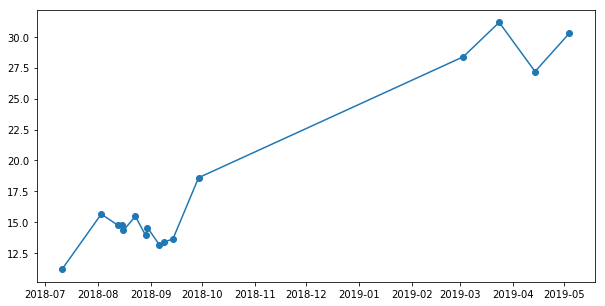

In [7]:
print(*sorted_points, sep="\n")

#https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger
plt.rcParams['figure.figsize'] = [10, 5]

#https://stackoverflow.com/questions/18458734/python-plot-list-of-tuples
plt.plot_date(*zip(*sorted_points), linestyle='solid')

#plt.show()
plt.savefig(img_files[0][17:25]+'-'+img_files[-1][17:25]+'.png')

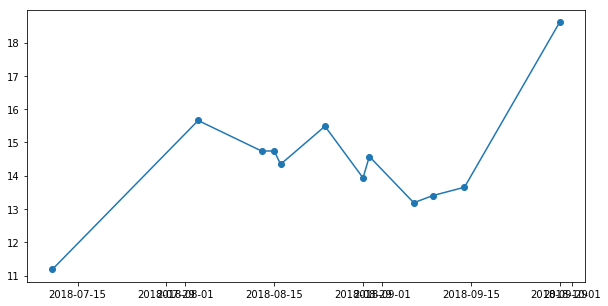

In [8]:
plt.plot_date(*zip(*sorted_points[:-4]), linestyle='solid')
plt.show()

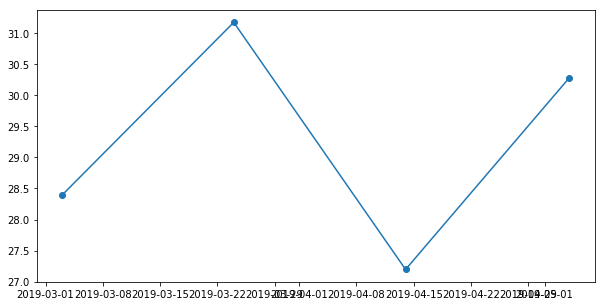

In [9]:
plt.plot_date(*zip(*sorted_points[-4:]), linestyle='solid')
plt.show()